In [1]:
%pwd

'C:\\Users\\Nicholas\\Desktop\\RR-jupyter-workshop\\code'

In [27]:
import pandas as pd
import numpy as np

In [15]:
VERBOSE = 1
cleaned_data_location = '../data/Processed/gapminder_cleaned.csv'
try:
    df = pd.read_csv(cleaned_data_location)
    if VERBOSE == 1:
        print(df.head())
except:
    print("whoops")

   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [12]:
df.head()

,year,pop,lifeexp,gdppercap,country,continent
0,1952,8425333,28.801,779.445314,afghanistan,asia
1,1957,9240934,30.332,820.853030,afghanistan,asia
2,1962,10267083,31.997,853.100710,afghanistan,asia
3,1967,11537966,34.020,836.197138,afghanistan,asia
4,1972,13079460,36.088,739.981106,afghanistan,asia


In [18]:
years = df['year'].unique()

In [23]:
years.sort()
years
assert min(years) == 1952

In [22]:
min(years)

1952

# What is the mean life expectancy in asia through time?

In [43]:
# Start with 1952
# narrow down data to asia

mask_asia = df['continent'] == "asia"
df_asia = df[mask_asia]

mask_1952 = df_asia['year'] == 1952
df_1952 = df_asia[mask_1952]

value = np.mean(df_1952['lifeexp'])
value

46.314393939393945

In [52]:
x = df_asia['year'].unique()
x

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [61]:
mask_asia = df['continent'] == "asia"
df_asia = df[mask_asia]

summary = []

VERBOSE = 1
for x in years:
    if VERBOSE:
        print(x)
    mask_year = df_asia['year'] == x
    df_year = df_asia[mask_year]
    value = np.mean(df_year['lifeexp'])
    summary.append(('asia', x, value))

summary = pd.DataFrame(summary, columns=['continent', 'year', 'LifeExp'])

1952
1957
1962
1967
1972
1977
1982
1987
1992
1997
2002
2007


In [47]:
# How could we use variables to make this easier to run across continents

In [58]:
mask_year

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11       True
84      False
85      False
86      False
87      False
88      False
89      False
90      False
91      False
92      False
93      False
94      False
95       True
96      False
97      False
98      False
99      False
100     False
101     False
        ...  
1650    False
1651    False
1652    False
1653    False
1654    False
1655     True
1656    False
1657    False
1658    False
1659    False
1660    False
1661    False
1662    False
1663    False
1664    False
1665    False
1666    False
1667     True
1668    False
1669    False
1670    False
1671    False
1672    False
1673    False
1674    False
1675    False
1676    False
1677    False
1678    False
1679     True
Name: year, Length: 396, dtype: bool

In [65]:
VERBOSE = 0
summary = []

for continent in df['continent'].unique():
    if VERBOSE:
            print(continent)
    mask_continent = df['continent']==continent
    print(mask_continent)
    df_continent  = df[mask_continent]
    print(df_continent)
    years = df_continent['year'].unique()
    for year in years:
        if VERBOSE:
            print(year)
        mask_year = df_continent['year'] == year
        df_year = df_continent[mask_year]
        value = np.mean(df_year['lifeexp'])
        summary.append((continent, year, value))
    
summary = pd.DataFrame(summary, columns=['Continent', 'Year', 'LifeExp'])


summary.groupby('Continent').mean()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1674     True
1675     True
1676     True
1677     True
1678     True
1679     True
1680    False
1681    False
1682    False
1683    False
1684    False
1685    False
1686    False
1687    False
1688    False
1689    False
1690    False
1691    False
1692    False
1693    False
1694    False
1695    False
1696    False
1697    False
1698    False
1699    False
1700    False
1701    False
1702    False
1703    False
Name: continent, Length: 1704, dtype: bool
      year       pop  lifeexp     gdppercap             country continent
0     1952   8425333   28.801

,Year,LifeExp
Continent,,
africa,1979.5,48.865330
americas,1979.5,64.658737
asia,1979.5,60.064903
europe,1979.5,71.903686
oceania,1979.5,74.326208


In [68]:
def add_two(input_num):
    assert type(input_num) == int
    b = input_num + 2
    return b

add_two(3)

5

In [69]:
add_two(5.5)

AssertionError: 

In [74]:
# write a function to calculate mean value per year for a continent per catagories

def calculate_mean_over_time(data, catagory, continent):
    #Create mask that selects continent of choice
    mask_continent = data['continent'] == continent # requires df has column called continent
    data_continent = data[mask_continent] #goes through lines that are true
    
    #Loop throough years calculate the mean
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = np.mean(data_year[catagory])
        summary.append((continent, year, value))
    
    summary = pd.DataFrame(summary, columns = ['continent','year', catagory])
    return summary

In [71]:
calculate_mean_over_time(df, 'pop', 'asia')

,continent,year,pop
0,asia,1952,4.228356e+07
1,asia,1957,4.735699e+07
2,asia,1962,5.140476e+07
3,asia,1967,5.774736e+07
4,asia,1972,6.518098e+07
5,asia,1977,7.225799e+07
6,asia,1982,7.909502e+07
7,asia,1987,8.700669e+07
8,asia,1992,9.494825e+07
9,asia,1997,1.025238e+08


In [99]:
# write a function to calculate mean value per year for a continent per catagories

def calculate_mean_median_over_time(data, catagory, continent):
    """Calculates values of mean and median over time
    
    Args:
        data = a pandas data frame with a column named ' continent'
        catagory = a string htat includes a column headings in data
        continent = a strng that is one of the values in the continent column
    
    Returns:
        a pandas dataframe with headings continent, year, catagory mean, and catagory median
    
    """
    # check inputs
    assert 'continent' in data.columns.values
    assert continent in data['continent'].unique()
    #Create mask that selects continent of choice
    mask_continent = data['continent'] == continent # requires df has column called continent
    data_continent = data[mask_continent] #goes through lines that are true
    
    #Loop throough years calculate the mean
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        mean = np.mean(data_year[catagory])
        median = np.median(data_year[catagory])
        summary.append((continent, year, mean, median))
    
    summary = pd.DataFrame(summary, columns = ['continent','year', 'mean', 'median'])
    return summary

In [90]:
calculate_mean_median_over_time(df, 'pop', 'asia')

,continent,year,mean,median
0,asia,1952,4.228356e+07,7982342.0
1,asia,1957,4.735699e+07,9128546.0
2,asia,1962,5.140476e+07,10267083.0
3,asia,1967,5.774736e+07,11261690.0
4,asia,1972,6.518098e+07,12412593.0
5,asia,1977,7.225799e+07,13933198.0
6,asia,1982,7.909502e+07,14441916.0
7,asia,1987,8.700669e+07,16495304.0
8,asia,1992,9.494825e+07,17861905.0
9,asia,1997,1.025238e+08,21229759.0


In [100]:
help(calculate_mean_median_over_time)

Help on function calculate_mean_median_over_time in module __main__:

calculate_mean_median_over_time(data, catagory, continent)
    Calculates values of mean and median over time
    
    Args:
        data = a pandas data frame with a column named ' continent'
        catagory = a string htat includes a column headings in data
        continent = a strng that is one of the values in the continent column
    
    Returns:
        a pandas dataframe with headings continent, year, catagory mean, and catagory median



In [108]:
import pylab as plt
import matplotlib

In [103]:
#use this function to plot life expectancy over time across 
continents = df['continent'].unique()
fig, ax = plt.subplots()
for continent in continents:
    output = calculate_mean_over_time(df,'lifeexp', continent)
    output.plot.line('year', 'lifeexp', ax = ax, label = continent)

In [104]:
def calculate_statistic_over_time(data, category, continent, func):
    """Calculate values of a statistic through time
    
    Args:
       data: a pandas data frame that inculdes a colum heading 'continent' and 'year'
       category: a string that is one of the column heaings in data
       continent: a string that is one of the values in the continent column
       func: a function that can operate on a list of numbers (e.g. np.mean)
 
    Returns:
       a pandas dataframe with headings continent, year, category
    """
    # check inputs
    assert 'continent' in data.columns.values
    assert continent in data['continent'].unique()
    
    # Create a mask that selects the continent of choice

    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

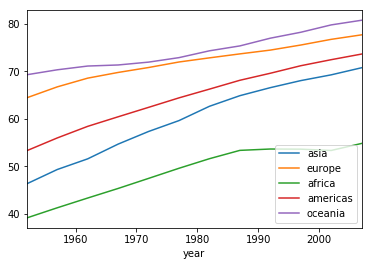

In [113]:
continents = df['continent'].unique()
fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df,'lifeexp', continent, np.mean)
    output.plot.line('year', 'lifeexp', ax = ax, label = continent)

In [112]:
%matplotlib inline

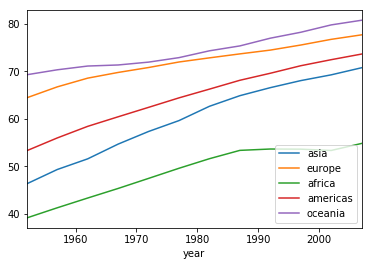

In [114]:
fig